# Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

# Data Extraction

In [2]:
df = pd.read_excel(r"C:\Users\Soft\Desktop\Py\Docs\Salary Data\MLR salary data.xlsx")

In [3]:
df.head()

,Position,Type,Location,Interview,Experience,Salary
0,DA,WFH,Remote,10,1.2,39344
1,DA,WFH,Remote,5,1.4,46206
2,DA,WFH,Remote,7,1.6,37732
3,DA,WFH,Remote,8,2.1,43526
4,DA,WFH,Remote,6,2.3,39892


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Position    30 non-null     object 
 1   Type        30 non-null     object 
 2   Location    30 non-null     object 
 3   Interview   30 non-null     int64  
 4   Experience  30 non-null     float64
 5   Salary      30 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ KB


# Exploratory Data Analysis

In [7]:
df["Position"].value_counts()

Position
DA    15
DS    15
Name: count, dtype: int64

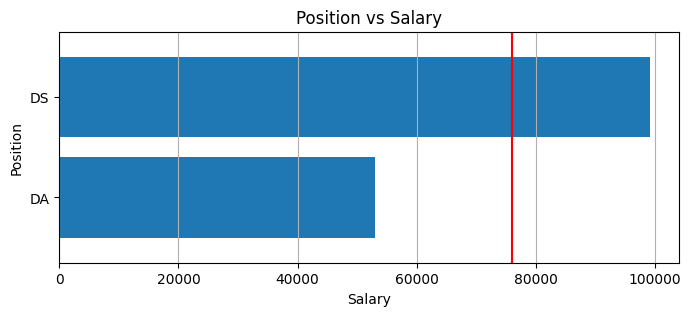

In [19]:
df.groupby("Position")["Salary"].mean().plot(kind="barh", figsize=(8,3), width=0.8, 
                                             title="Position vs Salary", xlabel="Salary")
plt.grid(axis="x")
plt.axvline(df["Salary"].mean(), color="red")
plt.show()

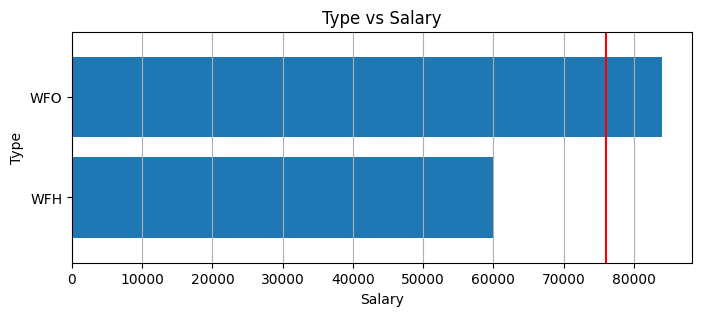

In [20]:
df.groupby("Type")["Salary"].mean().plot(kind="barh", figsize=(8,3), width=0.8, 
                                             title="Type vs Salary", xlabel="Salary")
plt.grid(axis="x")
plt.axvline(df["Salary"].mean(), color="red")
plt.show()

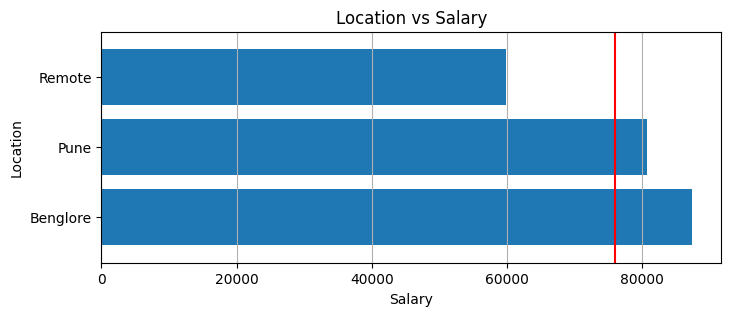

In [21]:
df.groupby("Location")["Salary"].mean().plot(kind="barh", figsize=(8,3), width=0.8, 
                                             title="Location vs Salary", xlabel="Salary")
plt.grid(axis="x")
plt.axvline(df["Salary"].mean(), color="red")
plt.show()

In [23]:
pd.pivot_table(df, index="Location", columns="Position", values="Salary", aggfunc="mean")

Position,DA,DS
Location,,
Benglore,58833.2,115890.8
Pune,58575.2,102912.2
Remote,41340.0,78472.6


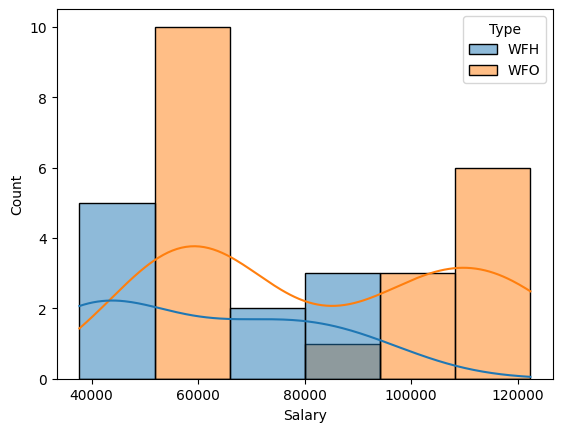

In [28]:
sns.histplot(df, x="Salary", kde="True", hue="Type")
plt.show()

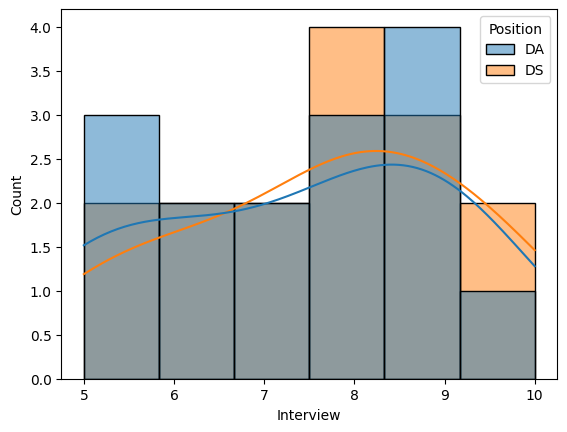

In [30]:
sns.histplot(df, x="Interview", kde="True", hue="Position")
plt.show()

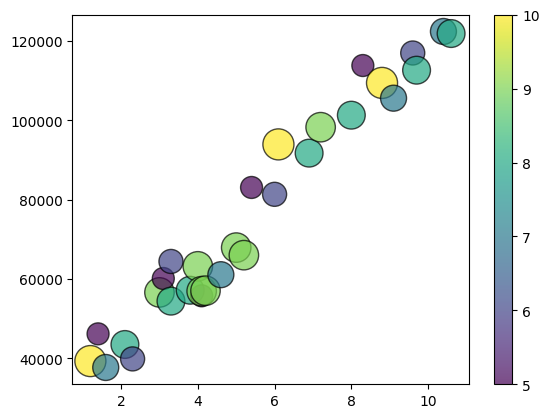

In [39]:
plt.scatter(df["Experience"], df["Salary"], s=df["Interview"]*50, c=df["Interview"], alpha=0.7, edgecolors="black")
plt.colorbar()
plt.show()

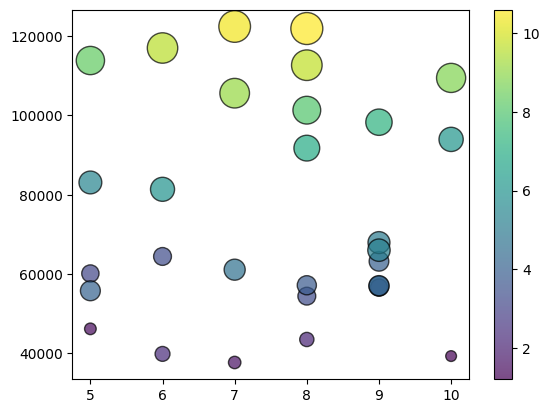

In [40]:
plt.scatter(df["Interview"], df["Salary"], s=df["Experience"]*50, c=df["Experience"], alpha=0.7, edgecolors="black")
plt.colorbar()
plt.show()

In [43]:
df[["Experience", "Interview", "Salary"]].corr()

,Experience,Interview,Salary
Experience,1.000000,0.042277,0.978242
Interview,0.042277,1.000000,0.004856
Salary,0.978242,0.004856,1.000000
